In [120]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
mnist = tf.keras.datasets.mnist

In [121]:
import matplotlib.pyplot as plt

In [122]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [123]:
def display_digit(num, x, y, vector = None):
    label = y[num]
    image = x[num]
    if vector is None:
        plt.title('Example: {}  Label: {}'.format(num, label))
        plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    else:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plt.title('Real label: {}'.format(label))
        plt.imshow(image, cmap=plt.get_cmap('gray_r'))
        plt.subplot(1,2,2)
        thisplot = plt.bar(range(10), vector, color="#777777")
        plt.ylim([0, 1]) 
        plt.xticks([])
        plt.yticks([])
        predicted_label = np.argmax(vector)
        thisplot[predicted_label].set_color('red')
        plt.title('Predicted label: {}'.format(predicted_label))
    plt.show()

In [ ]:
display_digit(0, x_train, y_train)

In [124]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(500, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3851 - accuracy: 0.8928 - val_loss: 0.1797 - val_accuracy: 0.9520
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2716 - accuracy: 0.9307 - val_loss: 0.1599 - val_accuracy: 0.9553
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2520 - accuracy: 0.9368 - val_loss: 0.1760 - val_accuracy: 0.9605
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2343 - accuracy: 0.9413 - val_loss: 0.1294 - val_accuracy: 0.9670
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9421 - val_loss: 0.1311 - val_accuracy: 0.9672
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2273 - accuracy: 0.9450 - val_loss: 0.1372 - val_accuracy: 0.9672
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2170 - accuracy: 0.9471 - val_loss: 0.1470 - val_accuracy:

In [ ]:
model.summary()

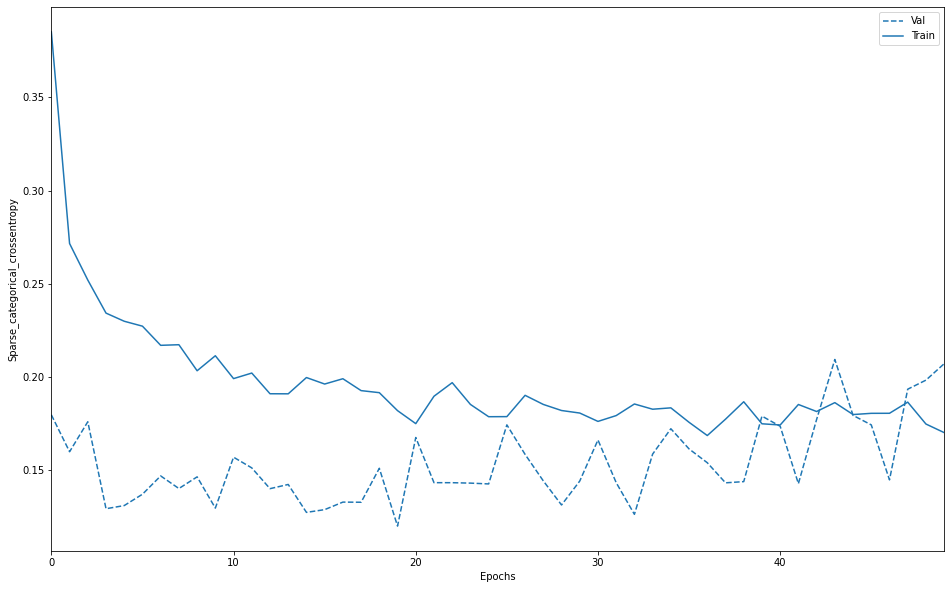

In [125]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

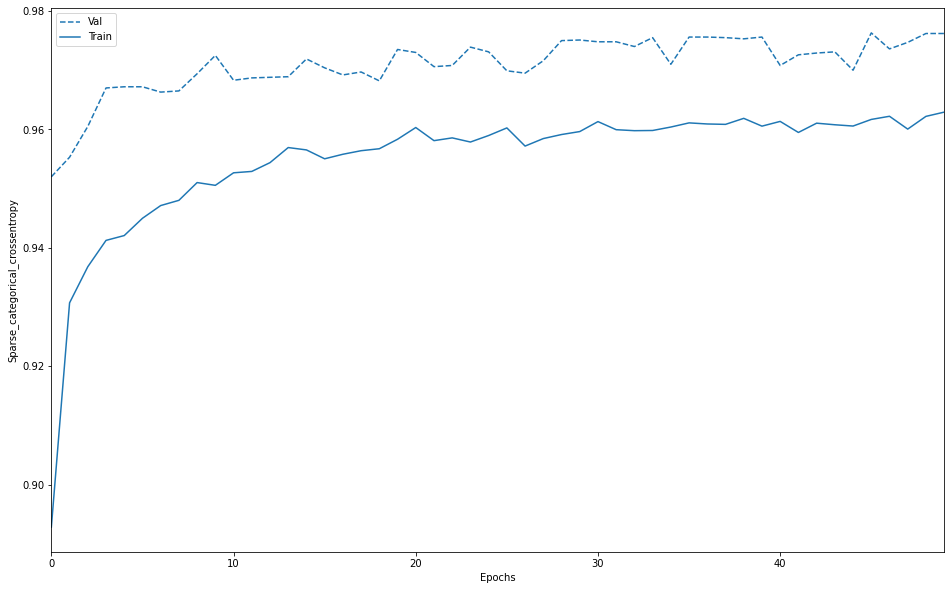

In [126]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'accuracy'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["accuracy"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(100, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

In [ ]:
model2.summary()

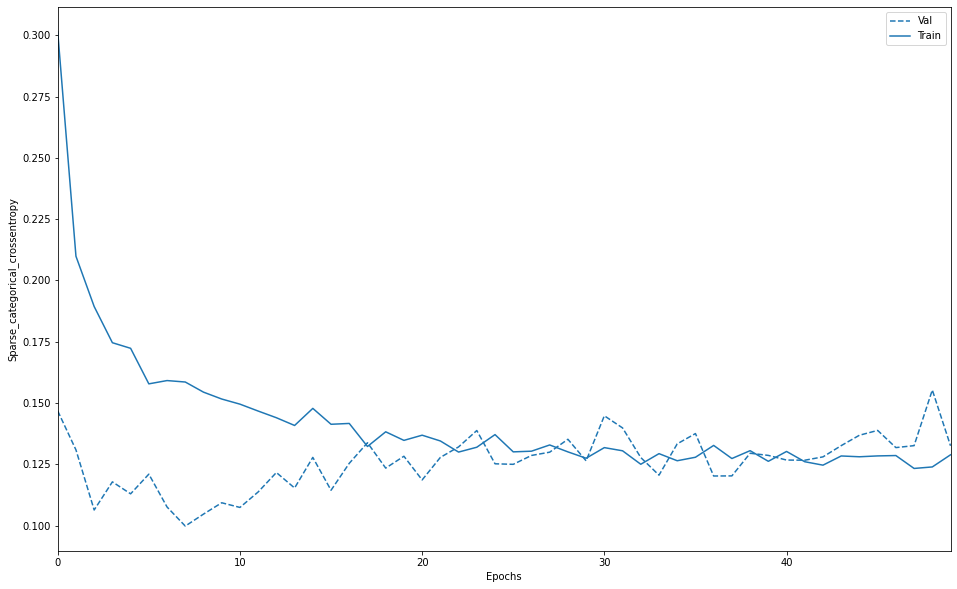

In [127]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history2.epoch, history2.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history2.epoch, history2.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

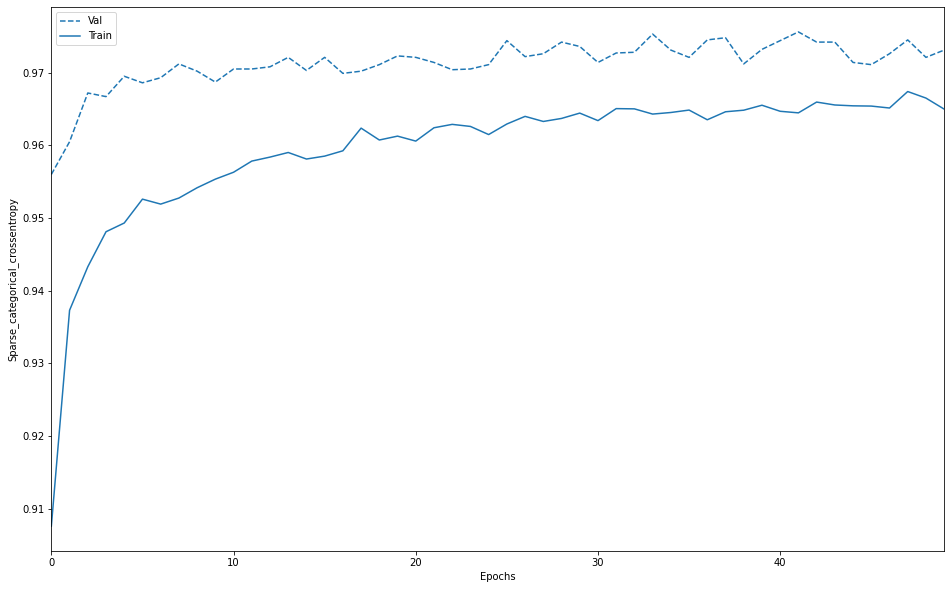

In [129]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history2.epoch, history2.history['val_'+'accuracy'],
                   '--', label='Val')
plt.plot(history2.epoch, history2.history["accuracy"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

In [ ]:
acc_percent1 = np.abs(np.array(history.history['accuracy']) - np.array(history.history['val_accuracy']))
acc_percent2 = np.abs(np.array(history2.history['accuracy']) - np.array(history2.history['val_accuracy']))
print(acc_percent1)
print(acc_percent2)

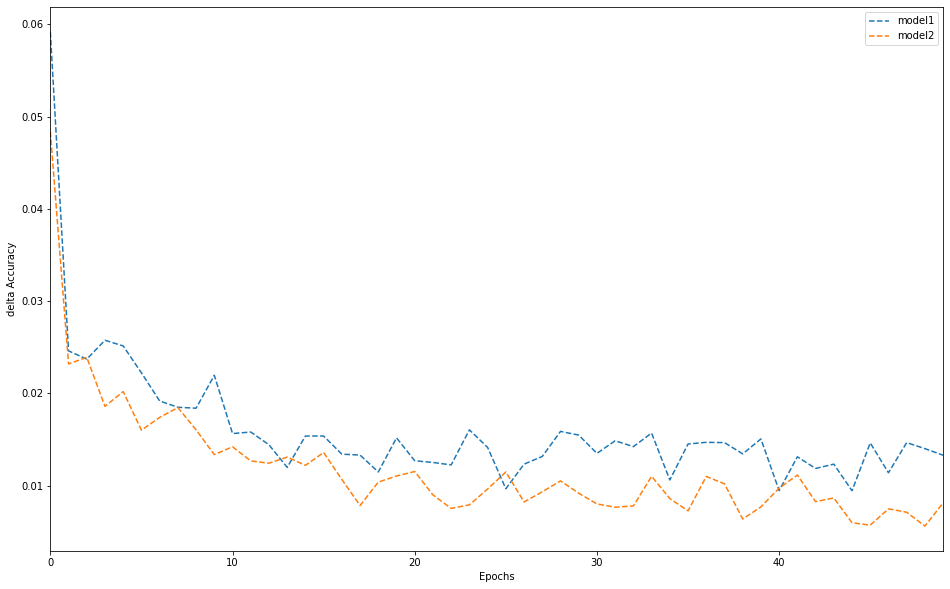

In [133]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("delta Accuracy")
val1 = plt.plot(history.epoch, acc_percent1,
                   '--', label='model1')
val2 = plt.plot(history2.epoch, acc_percent2,
                   '--', label='model2')
#plt.plot(history2.epoch, history2.history["accuracy"], color=val[0].get_color(),
 #            label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

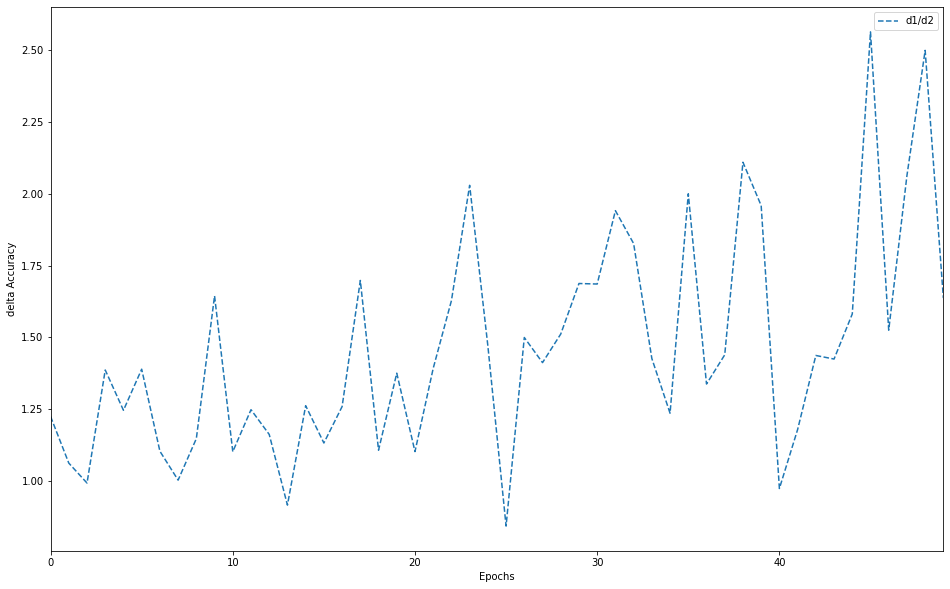

In [134]:
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("delta Accuracy")
val1 = plt.plot(history.epoch, np.divide(acc_percent1, acc_percent2),
                   '--', label='d1/d2')
#plt.plot(history2.epoch, history2.history["accuracy"], color=val[0].get_color(),
 #            label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

In [ ]:
for i in range(10):
    display_digit(i,x_test,y_test,model(x_test[i:i+1,:,:])[0])

In [ ]:
for i in range(10):
    display_digit(i,x_test,y_test,model2(x_test[i:i+1,:,:])[0])